In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
##used to get different color for different classes
from matplotlib.colors import ListedColormap

In [138]:
def knn_comparsion(data, n_neighbor=5,p=2):
    '''
    I will train your data on KNN and plot it
    '''
    input = raw_data.iloc[:,0:2]
    output = raw_data.iloc[:,2]
    
    ##grid width
    h=0.1
    #Classifier
    knn =  KNeighborsClassifier(n_neighbors=n_neighbor,weights='uniform',algorithm='kd_tree',p=p)
    knn.fit(input,output)
    
    ##It is used to define colormap for two different classes
    cmap_light = ListedColormap(['#FFAAAA','#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])
    
    ##Defining min and max axes of plot
    x_min, x_max = input.iloc[:,0].min() - 1,input.iloc[:,0].max() + 1
    y_min, y_max = input.iloc[:,1].min() - 1,input.iloc[:,1].max() + 1
    
    ##It creates mesh like structure of all the coordinates in the plot and then later
    ## we will color them
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    #print('x_min=/n',x_min)
    #print('xx=/n',xx)
    #print('yy=/n',yy)
    
    ## getting -1,1 label against coordinates generated from mesh
    Z = knn.predict(np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),axis=1))
    print('Shape of xx = \n', xx.shape)
    print('Shape of yy = \n', xx.shape)
    
    
    Z = Z.reshape(xx.shape)
    fig,ax = plt.subplots(1,figsize=(10,10))
    
    #plotting color agains every coordinate generated from mesh.
    ax.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    output[output==1]=int(1)
    output[output==-1]=int(0)
    
    ## shape of c and X and Y coordinate should be same
    ax.scatter(input.iloc[:,0],input.iloc[:,1],c=output,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    ax.set_title('KNN for '+ str(n_neighbor) +' neighbors')
    fig.show()
    

Shape of xx = 
 (79, 74)
Shape of yy = 
 (79, 74)


C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


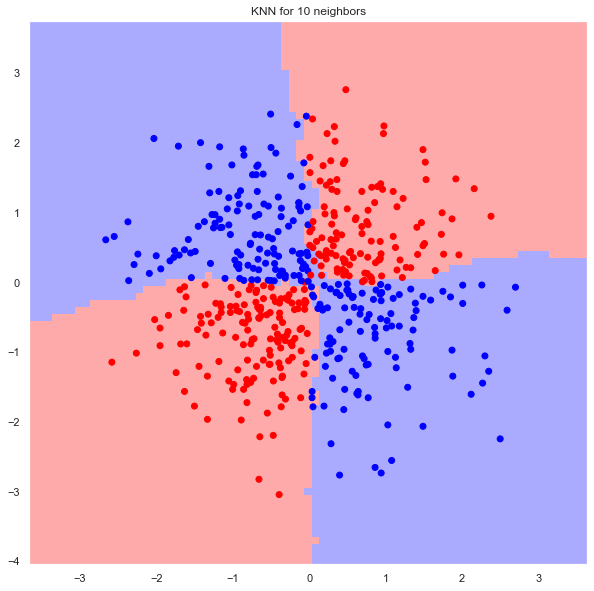

In [144]:
raw_data = pd.read_csv('./Dataset/xor.csv')
knn_comparsion(raw_data,10,2)

Shape of xx = 
 (47, 55)
Shape of yy = 
 (47, 55)


C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


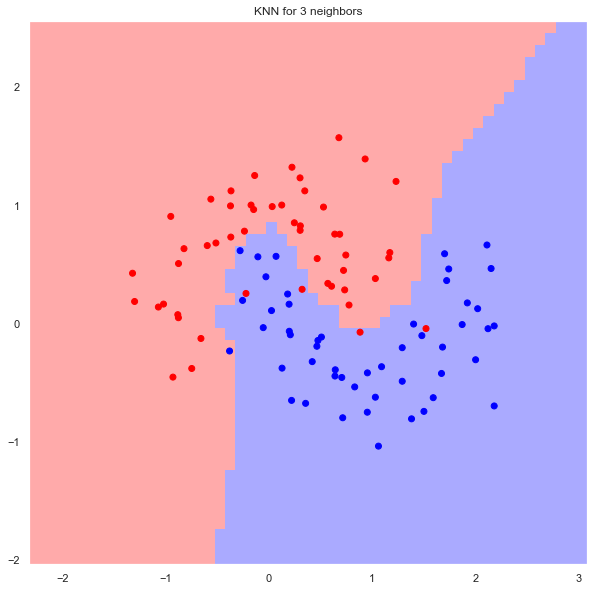

In [146]:
raw_data = pd.read_csv('./Dataset/ushape.csv')
knn_comparsion(raw_data,3,3)

(500,)